# Terrorism - 
## Task 2: Exploratory Data Analysis on Dataset - "Terrorism". Also as a security/defense analyst, try to find out the hot zone of terrorism.
### by Rugved. 

In [1]:
import pandas as pd 
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

### Inserting data

In [2]:
data = pd.read_csv(r"C:\Users\rugve\jupyter notebook projects\LGM vip\terrorism1.csv",encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
data.columns.values


array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
data.rename(columns={'iyear':'year','imonth':'month','iday':'day','gname':'group','country_txt':'Country','region_txt':'Region'
                     ,'provstate':'state','attacktype1_txt':'attacktype','targtype1_txt':'targettype','weaptype1_txt':'weapon'
                     ,'nkill':'kill','nwound':'wound'},inplace=True)

In [5]:
data = data[['year','month','day','Country','state','Region','city','latitude','longitude','attacktype','kill',
               'wound','target1','summary','group','targettype','weapon','motive']]

In [6]:
data.head()

,year,month,day,Country,state,Region,city,latitude,longitude,attacktype,kill,wound,target1,summary,group,targettype,weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
data.isnull().sum()

year               0
month              0
day                0
Country            0
state            421
Region             0
city             434
latitude        4556
longitude       4557
attacktype         0
kill           10313
wound          16311
target1          636
summary        66129
group              0
targettype         0
weapon             0
motive        131130
dtype: int64

In [8]:
data.shape

(181691, 18)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        181691 non-null  int64  
 1   month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   state       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   city        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   attacktype  181691 non-null  object 
 10  kill        171378 non-null  float64
 11  wound       165380 non-null  float64
 12  target1     181055 non-null  object 
 13  summary     115562 non-null  object 
 14  group       181691 non-null  object 
 15  targettype  181691 non-null  object 
 16  weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [10]:
data['Wwund'] = data['wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

In [11]:
data['casualties'] = data['kill'] + data['wound']

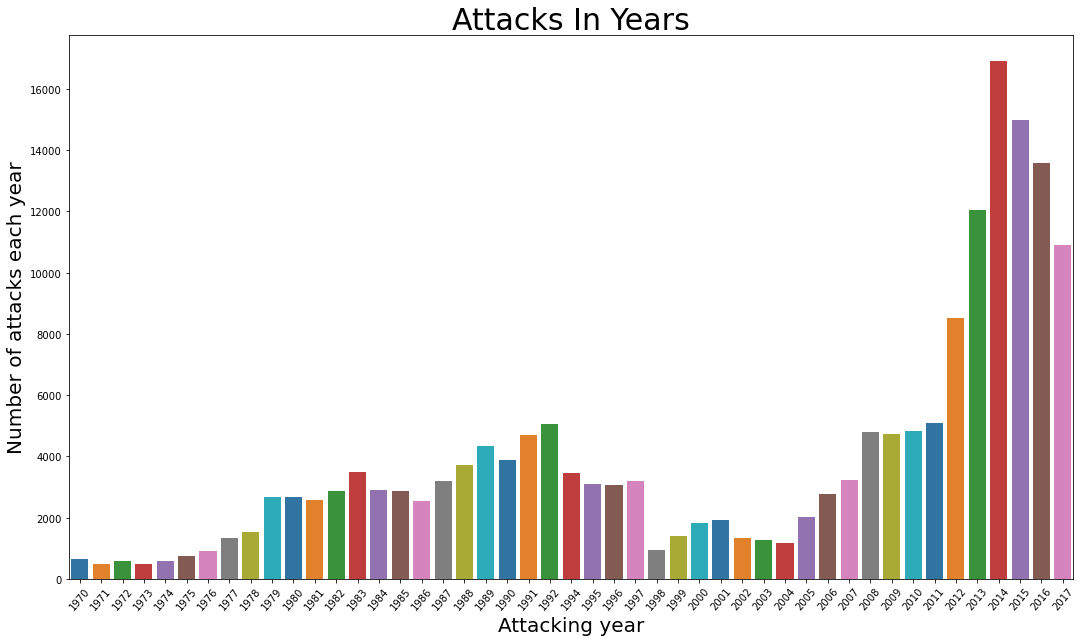

In [12]:
year = data['year'].unique()
years_count = data['year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year, y = years_count, palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking year', fontsize = 20)
plt.ylabel('Number of attacks each year', fontsize = 20)
plt.title('Attacks In Years', fontsize = 30)
plt.show()

In [13]:
attack = data.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [14]:
data.group.value_counts()[:10]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: group, dtype: int64

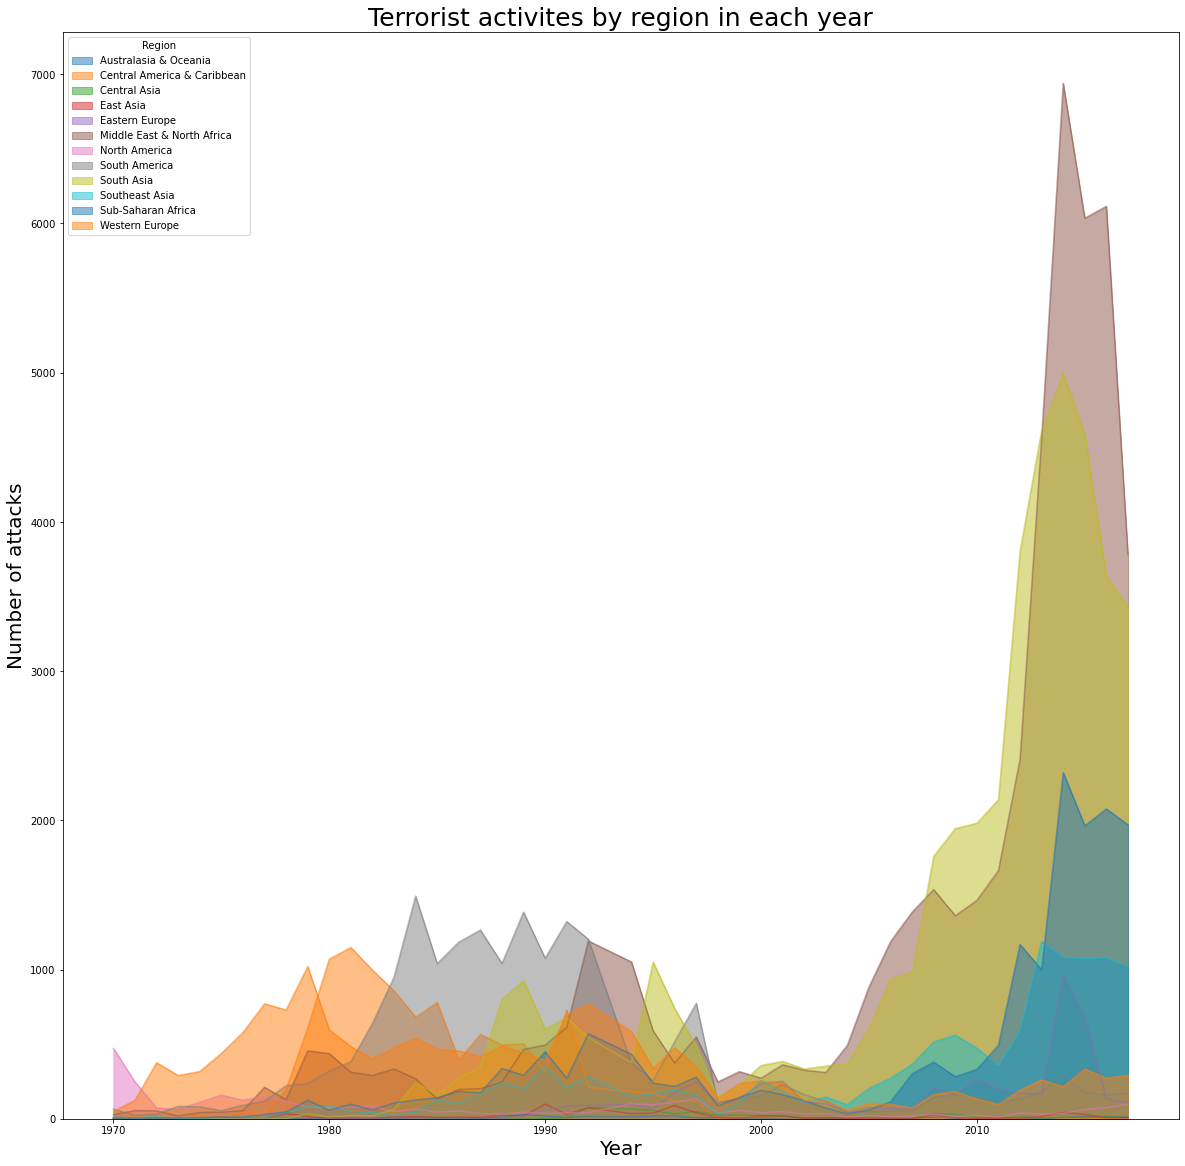

In [15]:
pd.crosstab(data.year, data.Region).plot(kind='area',stacked=False,
                                         figsize=(20,20))
plt.title('Terrorist activites by region in each year', fontsize=25)
plt.ylabel('Number of attacks',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.show()

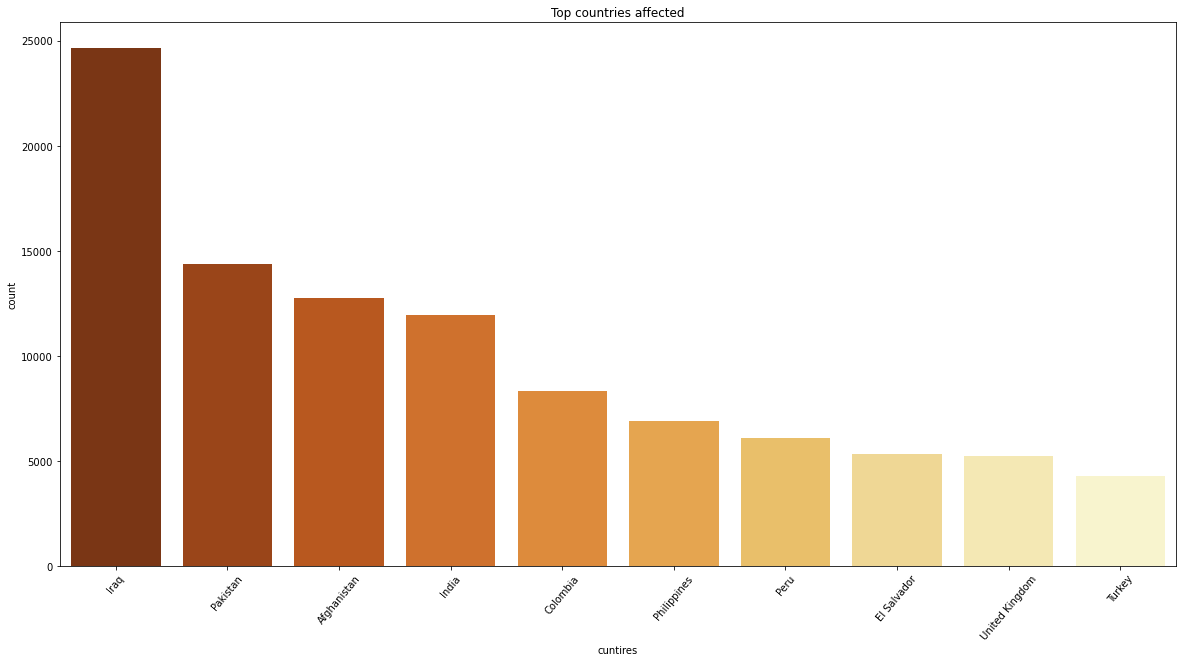

In [16]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index, data['Country'].
            value_counts()[:10].values, palette='YlOrBr_r')
plt.xlabel('cuntires')
plt.ylabel('count')
plt.xticks(rotation=50)
plt.title('Top countries affected')
plt.show()


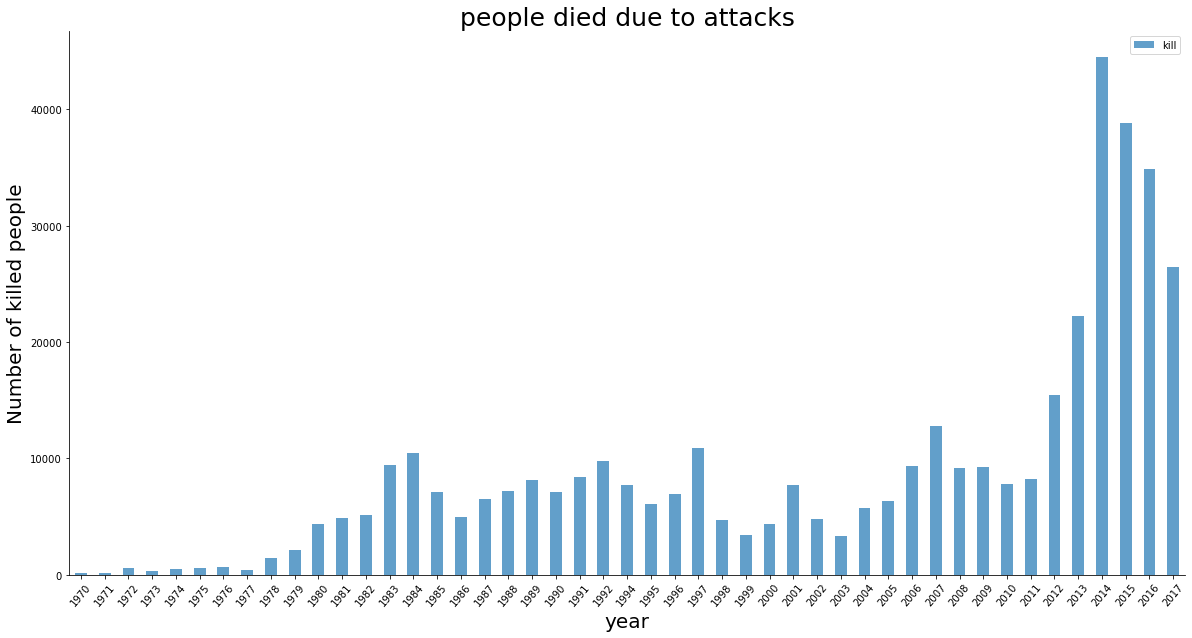

In [17]:
df = data[['year','kill']].groupby(['year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7, ax=ax4)
plt.title('people died due to attacks', fontsize=25)
plt.xticks(rotation=50)
plt.xlabel('year',fontsize=20)
plt.ylabel('Number of killed people',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)


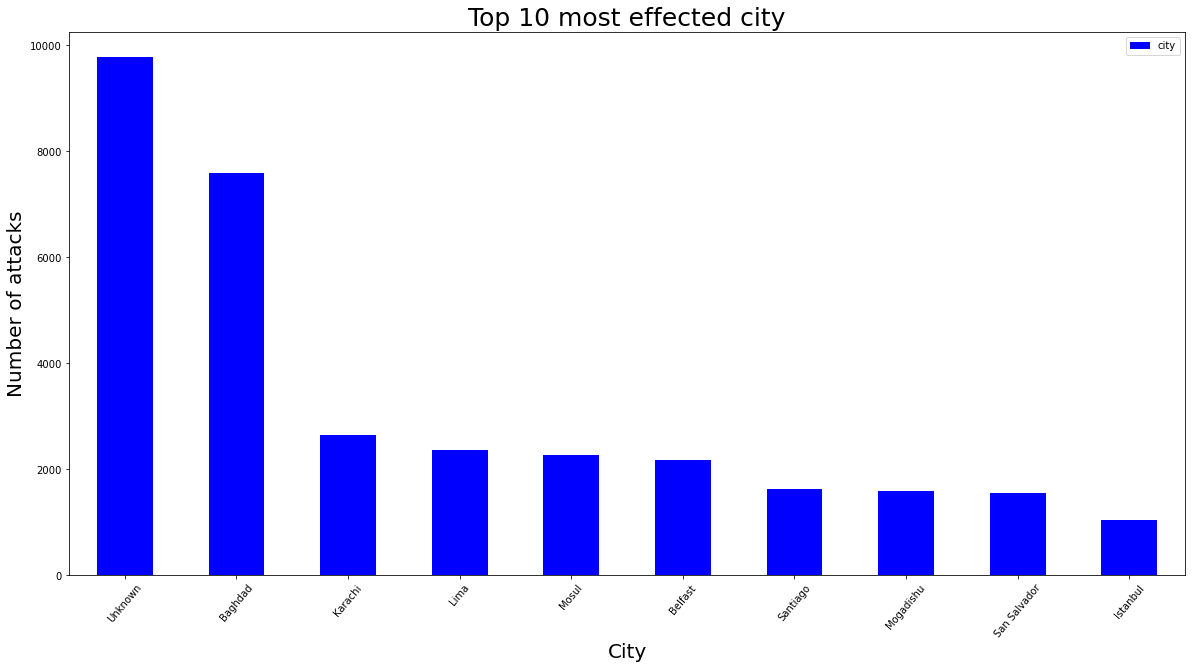

In [18]:
data['city'].value_counts().to_frame().sort_values('city', axis=0, 
        ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation=50)
plt.xlabel('City', fontsize=20)
plt.ylabel('Number of attacks', fontsize=20)
plt.title('Top 10 most effected city', fontsize=25)
plt.show()


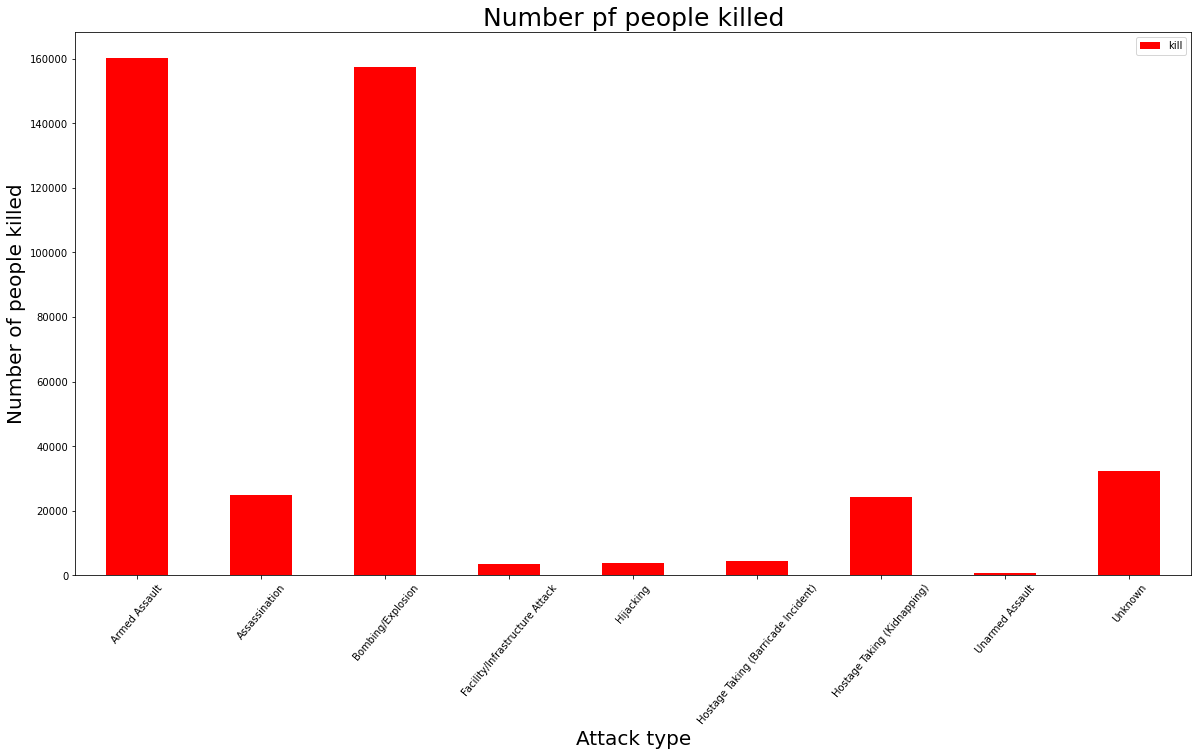

In [19]:
data[['attacktype', 'kill']].groupby(["attacktype"],axis=0).sum().plot(kind='bar', figsize=(20,10),color=['red'])
plt.xticks(rotation=50)
plt.title('Number pf people killed', fontsize=25)
plt.ylabel('Number of people killed', fontsize=20)
plt.xlabel('Attack type',fontsize=20)
plt.show()

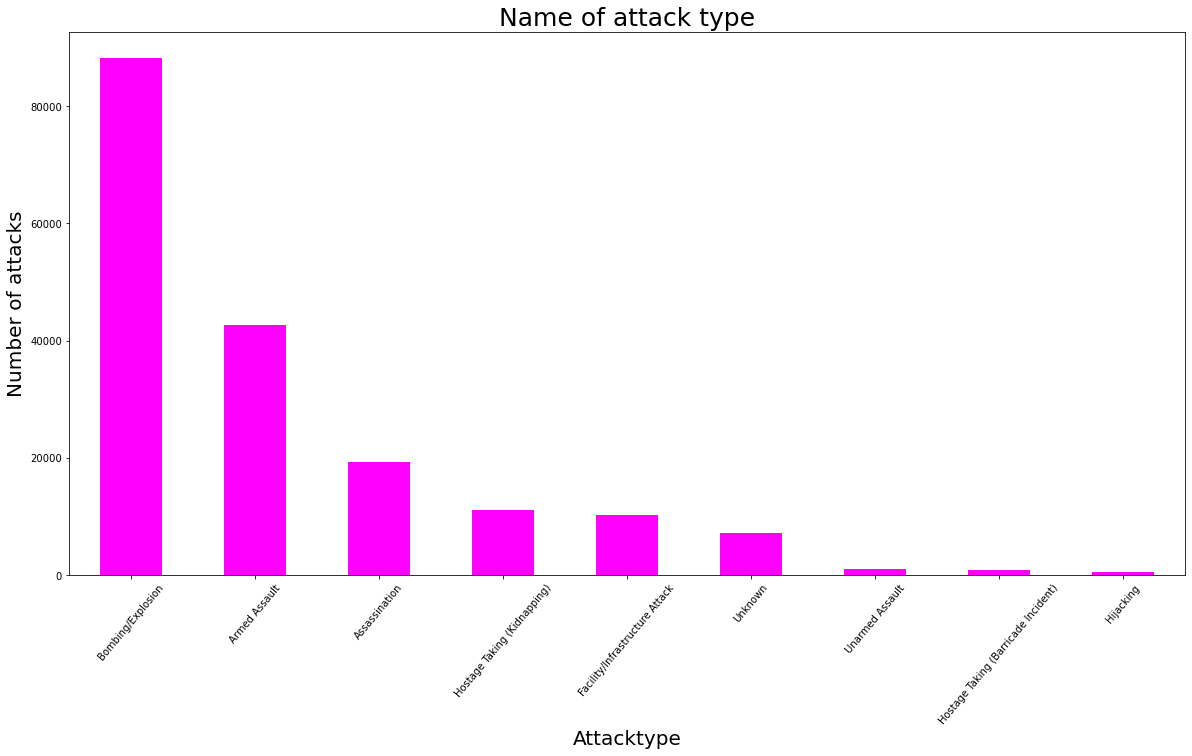

In [20]:
data['attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='magenta')
plt.xticks(rotation = 50)
plt.xlabel('Attacktype', fontsize=20)
plt.ylabel('Number of attacks', fontsize=20)
plt.title('Name of attack type', fontsize=25)
plt.show()

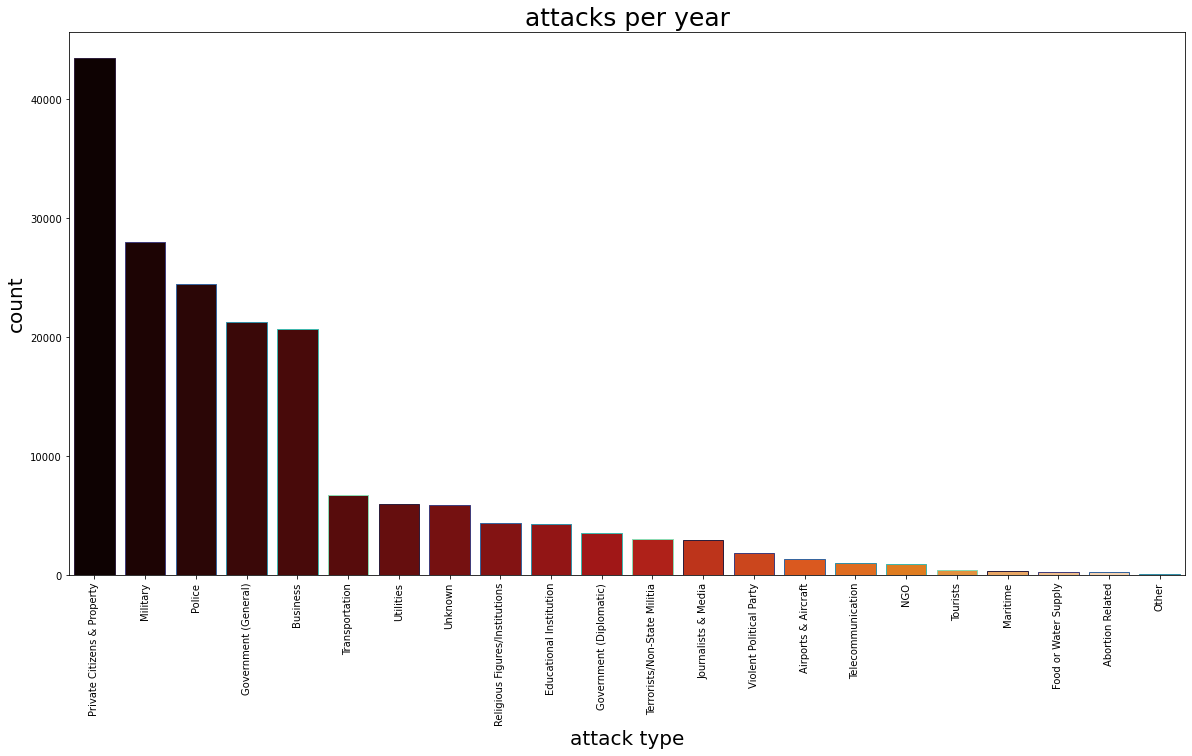

In [25]:
plt.subplots(figsize=(20,10))
sns.countplot(data["targettype"],order=data["targettype"].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("attack type", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.title("attacks per year", fontsize=25)
plt.show()

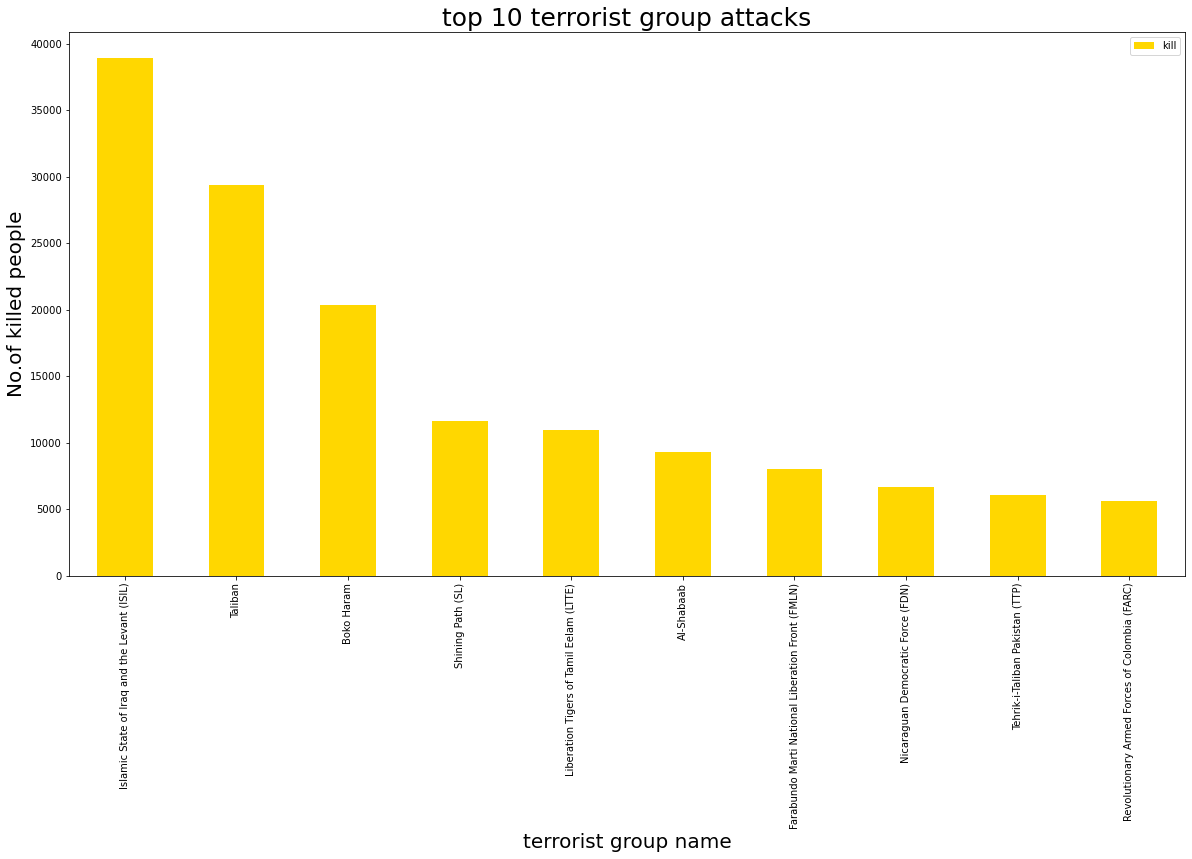

In [31]:
data[['group','kill']].groupby(['group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar', color='gold',figsize=(20,10))
plt.title('top 10 terrorist group attacks', fontsize=25)
plt.xlabel('terrorist group name', fontsize=20)
plt.ylabel('No.of killed people', fontsize=20)
plt.show()

In [33]:
df=data[['group','Country','kill']]
df=df.groupby(['group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(11)
df

,group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [34]:
kill = data.loc[:,'kill']
print('Number of people killed by terrorist attacks -', int(sum(kill.dropna())))

Number of people killed by terrorist attacks - 411868


In [35]:
typekill = data.pivot_table(columns='attacktype', values='kill', aggfunc='sum')
typekill

attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [36]:
countrykill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countrykill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


# Conclusion and Results : 
### COuntry with the most attacks - Iraq
### City with most attacks - Baghdad 
### Region with the most attacks - Middle east and North africa 
### Year with the most attacks - 2014
### Group with the most attacks - Taliban 
### Most attacks type - Bombing/Explosion